# **1-Dataset Analysis:**


## *i) Cleaning Dataset:* <br />
   Jan 23 Last edits

Latest check 30th of Jan. 2023 at 5:00PM

### **Importings:**

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from ast import literal_eval




In [20]:
data= pd.read_csv("../data-history/up-to-date-MAL/anime_Feb23.csv")


print(data.shape)
data.head(5).T

(23936, 31)


,0,1,2,3,4
id,16498,1535,5114,30276,11757
title,Shingeki no Kyojin,Death Note,Fullmetal Alchemist: Brotherhood,One Punch Man,Sword Art Online
media_type,tv,tv,tv,tv,tv
mean,8.53,8.62,9.11,8.5,7.2
num_scoring_users,2585993,2550564,1957838,2072686,2029840
status,finished_airing,finished_airing,finished_airing,finished_airing,finished_airing
num_episodes,25.0,37.0,64.0,12.0,25.0
start_date,2013-04-07,2006-10-04,2009-04-05,2015-10-05,2012-07-08
end_date,2013-09-29,2007-06-27,2010-07-04,2015-12-21,2012-12-23
source,manga,manga,manga,web_manga,light_novel


### Taking care of nulls and drops:

In [21]:
drops=["main_picture_medium","main_picture_large","broadcast_day_of_the_week","broadcast_start_time","alternative_titles_en","alternative_titles_ja","alternative_titles_synonyms"]
data['fav_percent'] = data['num_favorites'] / data['num_list_users']
data_main=data.drop(drops,axis=1)[['id','title','media_type','mean','num_scoring_users','num_episodes',"source",'popularity','fav_percent','rank','rating',"genres","studios",'synopsis',"nsfw"]]

In [22]:
data_main.isnull().sum()

id                       0
title                    0
media_type               0
mean                  8794
num_scoring_users        0
num_episodes           566
source                3766
popularity               0
fav_percent          10231
rank                  1925
rating                 550
genres                   0
studios                  0
synopsis              4373
nsfw                     0
dtype: int64

In [23]:
df = data_main[data_main.synopsis.isna()]

<AxesSubplot:xlabel='media_type'>

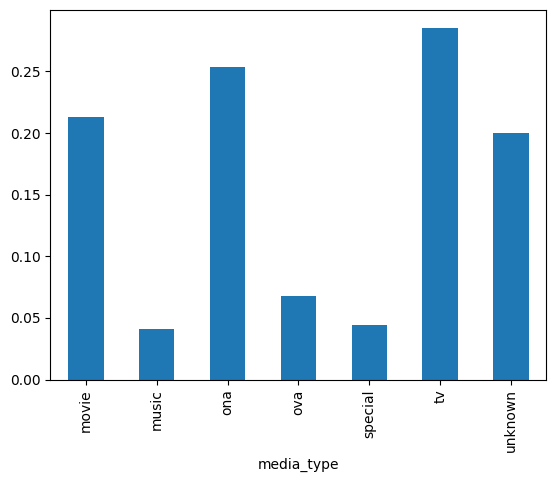

In [24]:
(df.groupby('media_type')['media_type'].count()/data_main.groupby('media_type')['media_type'].count()).plot(kind='bar')

<AxesSubplot:xlabel='source'>

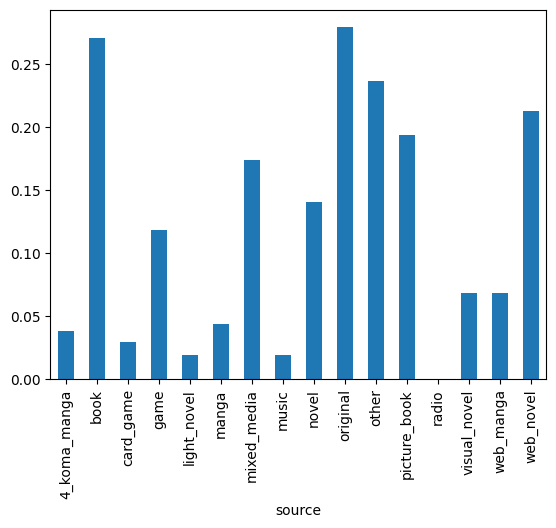

In [25]:
(df.groupby('source')['source'].count()/data_main.groupby('source')['source'].count()).plot(kind='bar')

<AxesSubplot:xlabel='rating'>

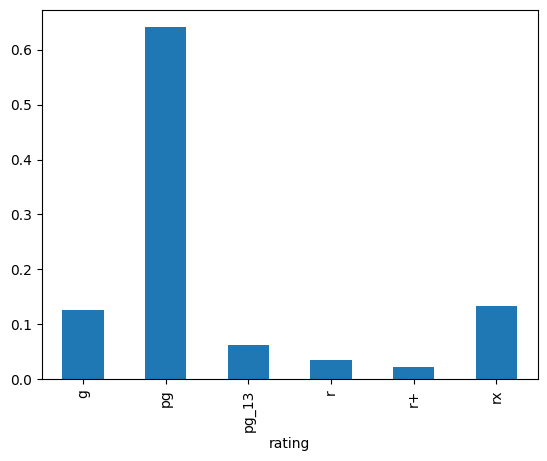

In [26]:
(df.groupby('rating')['rating'].count()/data_main.groupby('rating')['rating'].count()).plot(kind='bar')

<AxesSubplot:xlabel='nsfw'>

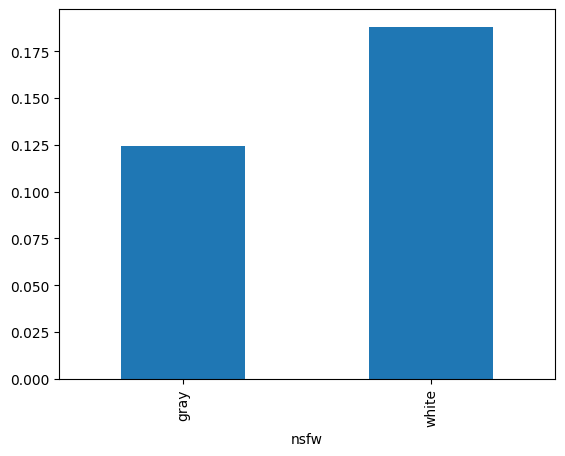

In [27]:
(df.groupby('nsfw')['nsfw'].count()/data_main.groupby('nsfw')['nsfw'].count()).plot(kind='bar')

In [28]:
def fill_na(df,col):
    index = df[df[col].isna()].index
    value = np.abs(np.random.normal(loc=df[col].mean(), scale=df[col].std(), size=df[col].isna().sum()))
    df[col] = df[col].fillna(pd.Series(value, index=index))

In [29]:
fill_na(data_main,'mean')
fill_na(data_main,'rank')
data_main['fav_percent'] = data_main['fav_percent'].fillna(value=round(data_main['fav_percent'].mean(),3))
data_main['num_episodes'] = data_main['num_episodes'].fillna(value=round(data_main['num_episodes'].mean()))
data_main['source'] = data_main['source'].fillna(value=data_main['source'].mode()[0])
data_main['rating'] = data_main['rating'].fillna(value=data_main['rating'].mode()[0])
data_main['synopsis'] = data_main['synopsis'].fillna('')

In [30]:
data_main.isnull().sum()


id                   0
title                0
media_type           0
mean                 0
num_scoring_users    0
num_episodes         0
source               0
popularity           0
fav_percent          0
rank                 0
rating               0
genres               0
studios              0
synopsis             0
nsfw                 0
dtype: int64

In [31]:
data_main.nunique()

id                   23936
title                23936
media_type               7
mean                  9349
num_scoring_users     8214
num_episodes           251
source                  16
popularity           23767
fav_percent          11506
rank                 23557
rating                   6
genres                5282
studios               1488
synopsis             19294
nsfw                     2
dtype: int64

In [32]:
data_main.columns

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users',
       'num_episodes', 'source', 'popularity', 'fav_percent', 'rank', 'rating',
       'genres', 'studios', 'synopsis', 'nsfw'],
      dtype='object')

## Preprocessing:

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from tqdm.notebook import tqdm
import ast
import re
import spacy as sp
from keybert import KeyBERT
from sklearn.feature_extraction.text import TfidfVectorizer


In [16]:
data_main.title.head(10)

0                  Shingeki no Kyojin
1                          Death Note
2    Fullmetal Alchemist: Brotherhood
3                       One Punch Man
4                    Sword Art Online
5               Boku no Hero Academia
6                    Kimetsu no Yaiba
7                              Naruto
8                         Tokyo Ghoul
9              Hunter x Hunter (2011)
Name: title, dtype: object

## *ii)EDA:*

In [17]:
data_main.columns

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users',
       'num_episodes', 'source', 'popularity', 'fav_percent', 'rank', 'rating',
       'genres', 'studios', 'synopsis', 'nsfw'],
      dtype='object')

In [18]:
data_main['mean'].values[0]

8.53

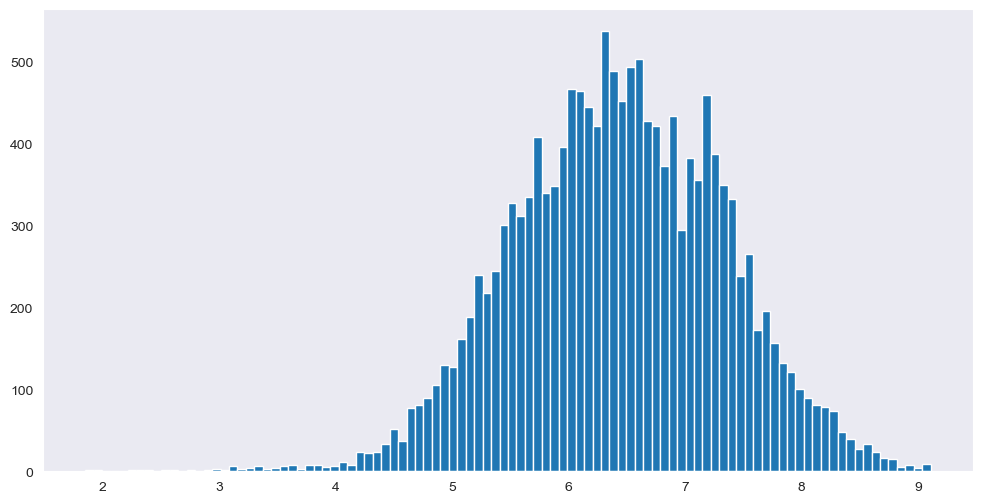

In [19]:
sns.set_style("dark")
plt.figure(figsize=(12,6))
plt.hist(data['mean'], bins=100)
plt.show()

In [20]:
fig = px.pie(data_main, 'media_type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

*Notes:* Naturally TV has higher percentage as anime media.


<AxesSubplot: >

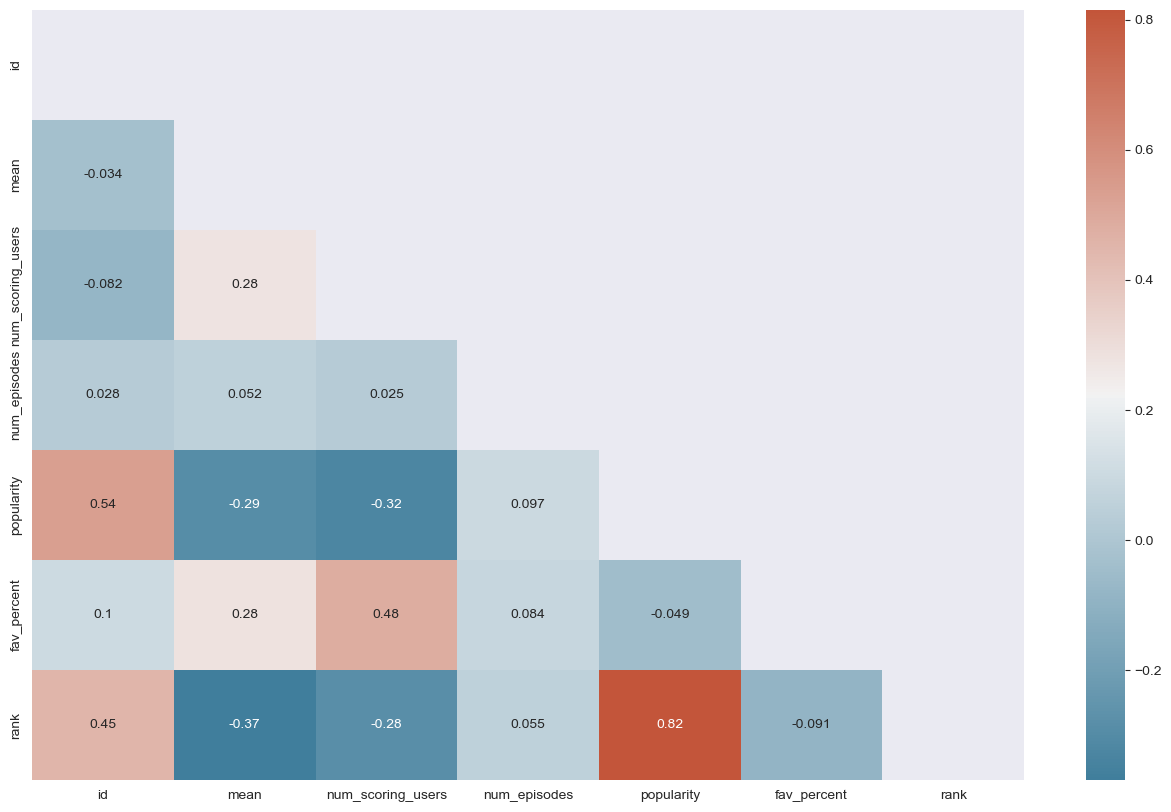

In [21]:
corr = data_main.corr()

# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(16, 10))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

*Notes:*  So, basically interesting factors that are affecting the mean factor are : rank, popularity, num_scoring_users, ignore num_list_users for now till further investigation of difference.

In [22]:
fig = px.histogram(data[pd.to_datetime(data['start_date']).dt.year >= 1980], x='start_date', color='media_type')
fig.update_layout(bargap=0.1)

*Notes:* Obviously 2016 was a good year for Otakus :3 specially summer-Autumn-Fall seasons, with 119 tv, 45 movie, 23 ova, 61 ona, 60 special and 41 music. (Gotta check watching list lmao).

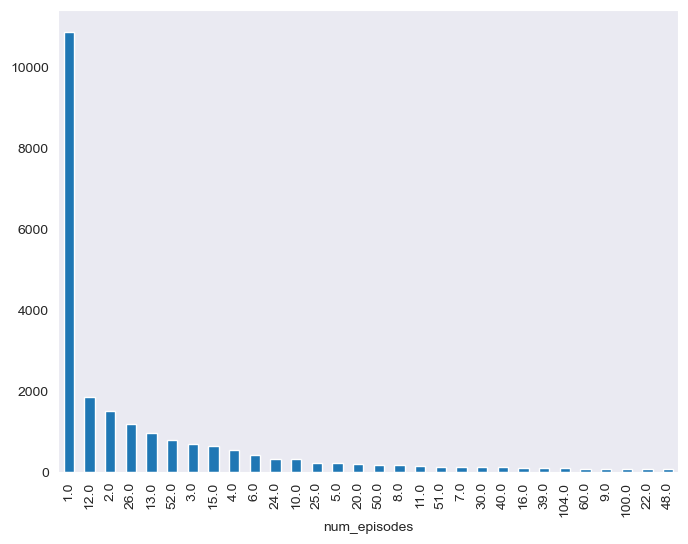

In [23]:
data_main.groupby('num_episodes')['id'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(8,6))
plt.show()

*Notes:* A lot of Movies (1 episode) that's why the spike, but the summation of all others are the other percentages of tv,ova,ona,... etc. most tv/specials are short 12 (episodes)/(season|title). </br>
*The fans of "When you have eliminated the impossible" teenager for 22+ years don't give up :(* </br>
*Gomu Gomu no guys don't be Sadge :(*

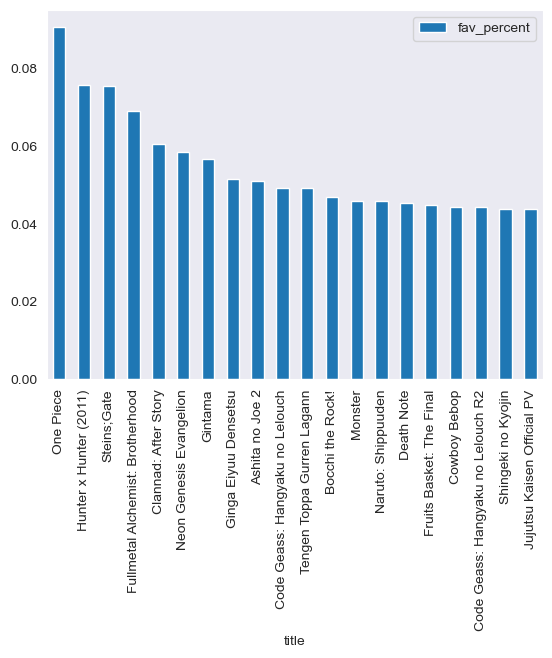

In [24]:
#data_main[['title','fav_percent']].sort_values(by=['fav_percent'],ascending=False).head(30).plot(kind='bar', figsize=(15,10))
data_main.sort_values(by=['fav_percent'],ascending=False)[1:21].plot(kind='bar',x='title',y='fav_percent');

One Piece in the top as expected

###  NLP Pre-processing

### Synopsis Keyword Analysis:
*(NLP)* :
* KeyBERT.
* Spacy.


* Creating clean text, nouns and keywords from synopsis.
* Separate in new df for data analysis.
* Delete Syns entries from main df.


In [25]:
NLP = sp.load("en_core_web_lg")
TITLE = 'Death Note'
key_model = KeyBERT()
data_main = data_main[~data_main.title.duplicated(keep='first')]
text = data_main[data_main['title'] == TITLE].synopsis.values[0]
def clean_text(text):
    text = re.sub("[\(\[].*?[\)\]]", "", text)
    text = text.replace('\n', "").replace('\r', "")
    text = text.replace('', "")
    text = re.sub('[^a-zA-Z]', " ", str(text))
    text = ' '.join(text.split())
    text = text.lower()
    doc = NLP(text)
    return doc

doc = clean_text(text)
print(doc)

brutal murders petty thefts and senseless violence pollute the human world in contrast the realm of death gods is a humdrum unchanging gambling den the ingenious year old japanese student light yagami and sadistic god of death ryuk share one belief their worlds are rotten for his own amusement ryuk drops his death note into the human world light stumbles upon it deeming the first of its rules ridiculous the human whose name is written in this note shall die however the temptation is too great and light experiments by writing a felon s name which disturbingly enacts his first murder aware of the terrifying godlike power that has fallen into his hands light under the alias kira follows his wicked sense of justice with the ultimate goal of cleansing the world of all evil doers the meticulous mastermind detective l is already on his trail but as light s brilliance rivals l s the grand chase for kira turns into an intense battle of wits that can only end when one of them is dead


In [26]:
data_main.loc[:,'cleaned_syn'] = data_main.loc[:,'synopsis'].astype(str).apply(clean_text)

In [27]:
data_main.columns

Index(['id', 'title', 'media_type', 'mean', 'num_scoring_users',
       'num_episodes', 'source', 'popularity', 'fav_percent', 'rank', 'rating',
       'genres', 'studios', 'synopsis', 'nsfw', 'cleaned_syn'],
      dtype='object')

In [28]:
df_string=data_main[['title','synopsis','cleaned_syn']]

In [33]:
df_num=pd.get_dummies(data_main[["media_type","source","nsfw","genres","rating","studios"]], columns=["media_type","source","nsfw","genres","rating","studios"], prefix=["media_type","source","nsfw","genres","rating","studios"])
df_num[['id','mean','num_scoring_users','num_episodes','popularity','fav_percent','rank']]=data_main[['id','mean','num_scoring_users','num_episodes','popularity','fav_percent','rank']]

In [30]:
# Based on https://stackoverflow.com/questions/48925328/how-to-get-all-noun-phrases-in-spacy
def get_candidates(doc):
    # code to recursively combine nouns
    # 'We' is actually a pronoun but included in your question
    # hence the token.pos_ == "PRON" part in the last if statement
    # suggest you extract PRON separately like the noun-chunks above

    index = 0
    noun_indices = [i for i, token in enumerate(doc) if token.pos_ == 'NOUN']
    candidates = []
    for idxValue in noun_indices:
        start = doc[idxValue].left_edge.i if not bool(doc[idxValue].left_edge.ent_type_) else idxValue
        finish = doc[idxValue].right_edge.i+1 if not bool(doc[idxValue].right_edge.ent_type_) else idxValue + 1
        if 0 < finish-start < 7:
            span = doc[start:finish]
            candidates.append(span.text)
    return candidates

candidates = get_candidates(doc)
print(candidates)


['brutal murders', 'petty thefts and senseless violence', 'senseless violence', 'the human world', 'contrast', 'the realm of death gods', 'death', 'death gods', 'gambling', 'a humdrum unchanging gambling den', 'ingenious year', 'student', 'light', 'sadistic god', 'their worlds', 'amusement', 'death', 'his death note', 'human world', 'the human world light', 'its rules', 'whose name', 'this note', 'the temptation', 'too great and light experiments', 'a felon s', 'a felon s name', 'his first murder', 'the terrifying godlike power', 'his hands', 'light', 'his wicked sense of justice', 'justice', 'the world of all evil doers', 'all evil doers', 'mastermind', 'the meticulous mastermind detective l', 'l', 'his trail', 'light s', 'light s brilliance', 'the grand chase', 'wits']


#### **Applying Key-BERT for Keywords extraction:**

In [31]:
key_model = KeyBERT()
def get_keywords(doc):
    keywords = key_model.extract_keywords(doc.text,keyphrase_ngram_range=(1, 2), candidates=candidates,stop_words='english', use_mmr=True, diversity=0.7)
    return keywords

In [32]:
get_keywords(doc)
df_string.loc[:,'nouns'] = df_string.loc[:,'cleaned_syn'].apply(get_candidates)

C:\Users\Lord MZ\AppData\Local\Temp\ipykernel_27104\978663173.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
df_string.loc[:,'keywords'] = df_string.loc[:,'cleaned_syn'].apply(get_keywords)

C:\Users\Lord MZ\AppData\Local\Temp\ipykernel_27104\3928247378.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
df_string.sample(20)

,title,synopsis,cleaned_syn,nouns,keywords
12636,Renjian Zui Deyi,"Six thousand years later, the once prosperous ...","(six, thousand, years, later, the, once, prosp...","[years, sword, the sword god chao qingqiu, the...","[(the realm of death gods, 0.3942), (his trail..."
17354,Ojarumaru: Wasureta Mori no Hinata,A special of the Ojarumaru series.,"(a, special, of, the, ojarumaru, series)",[a special of the ojarumaru series],"[(the terrifying godlike power, 0.2065), (a hu..."
4544,A-Channel: +A-Channel,Extra specials from the DVD/BDs.,"(extra, specials, from, the, dvd, bds)","[extra specials from the dvd bds, dvd, the dvd...","[(the temptation, 0.202), (too great and light..."
20184,Kuaile Xing Mao,This entry encompasses eight seasons of The Ad...,"(this, entry, encompasses, eight, seasons, of,...","[this entry, the adventures of star cat series...","[(ingenious year, 0.0922), (its rules, 0.0395)..."
8508,Dokidoki♡Densetsu: Mahoujin Guruguru,"Join the new legend of Guruguru, where Nike, t...","(join, the, new, legend, of, guruguru, where, ...","[guruguru, where nike the reluctant hero, the ...","[(the realm of death gods, 0.322), (student, 0..."
6093,Yarichin Kateikyoushi Netori Houkoku,"While being a home tutor to the young Shizuku,...","(while, being, a, home, tutor, to, the, young,...","[home, a home tutor, an unusual favor by her f...","[(his death note, 0.1531), (ingenious year, 0...."
9833,Girls & Panzer Movie: Cinematic Concert - Fush...,An additional episode of Fushou Akiyama Yukari...,"(an, additional, episode, of, fushou, akiyama,...","[an additional episode of fushou akiyama, the ...","[(senseless violence, 0.2321), (too great and ..."
6988,Chuan Shu Zijiu Zhinan: Xian Meng Pian,Second season of Chuan Shu Zijiu Zhinan.,"(second, season, of, chuan, shu, zijiu, zhinan)",[season],"[(ingenious year, 0.2193), (its rules, 0.1372)..."
5533,Mamono Hunter Youko,Yohko Mono is a regular girl making her way th...,"(yohko, mono, is, a, regular, girl, making, he...","[her way, high school, the earth, demons, the ...","[(the realm of death gods, 0.2462), (student, ..."
998,Isekai Meikyuu de Harem wo,"One day, high school student Michio Kaga attem...","(one, day, high, school, student, michio, kaga...","[day, high school, high school student, the in...","[(gambling, 0.3538), (too great and light expe..."


In [25]:
df_num.shape,df_string.shape

((23936, 6811), (23936, 3))

 `df_num` is the Data Frame for the Analytical approach and distance techniques. <br />
 `df_string` is the textual Data Frame for the NLP approaches to get contextual/semantic content based recommendations.

# 2- **MODELS TIME:** :3
![image info](https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/gettyimages-458406992-1538405221.jpg?crop=0.9xw:0.9xh;0,0&resize=256:*) <br />
  July's 2022 Work

## Similarity Analysis :

### Similarity Analysis Using The Numerical Features

#### Model 1 :  Nearest Neighbors

In [34]:
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree
scaler = StandardScaler()
scaler.fit(df_num.drop(['id'],axis=1).to_numpy())

X = scaler.transform(df_num.drop(['id'],axis=1).to_numpy())

In [35]:
def get_item_recommendations(anime_title, anime_idx=-1):
    if anime_idx == -1:     
        anime_idx = data_main[data_main['title'] == anime_title].index[0]
    return data_main.iloc[indices[anime_idx][1:]]

In [36]:
nbrs = NearestNeighbors(n_neighbors=15, algorithm='auto',metric = 'euclidean').fit(X)
_, indices = nbrs.kneighbors(X)

In [37]:
get_item_recommendations('Sword Art Online')

,id,title,media_type,mean,num_scoring_users,num_episodes,source,popularity,fav_percent,rank,rating,genres,studios,synopsis,nsfw
33,21881,Sword Art Online II,tv,6.700000,1260784,24.0,light_novel,34,0.004916,5510.00000,pg_13,"['Action', 'Adventure', 'Fantasy', 'Love Polyg...",['A-1 Pictures'],"A year after escaping Sword Art Online, Kazuto...",white
4313,53529,Sword Art Online (Original Movie),movie,6.250559,0,15.0,light_novel,4314,0.001911,2178.34906,pg_13,"['Action', 'Adventure', 'Fantasy', 'Love Polyg...",[],,white
30,23755,Nanatsu no Taizai,tv,7.680000,1263708,24.0,manga,31,0.009870,1196.00000,pg_13,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['A-1 Pictures'],In a world similar to the European Middle Ages...,white
70,28121,Dungeon ni Deai wo Motomeru no wa Machigatteir...,tv,7.550000,893500,13.0,light_novel,71,0.007884,1543.00000,pg_13,"['Action', 'Adventure', 'Fantasy']",['J.C.Staff'],Life in the bustling city of Orario is never d...,white
2697,32561,Hai to Gensou no Grimgar: Furoagari no Kabe ni...,special,6.590000,28376,1.0,light_novel,2698,0.000681,6093.00000,pg_13,['Comedy'],['A-1 Pictures'],OVA episode that will expand on the ending of ...,white
125,34577,Nanatsu no Taizai: Imashime no Fukkatsu,tv,7.600000,658986,24.0,manga,126,0.003566,1395.00000,pg_13,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['A-1 Pictures'],"The fierce battle between Meliodas, the captai...",white
5932,25117,Ryuugajou Nanana no Maizoukin: Nanana Nippon M...,special,6.530000,2154,6.0,light_novel,5933,0.000306,6493.00000,pg_13,['Comedy'],['A-1 Pictures'],Specials included on the Blu-ray/DVD volumes.,white
14528,45595,Baten Kaitos,music,6.880000,122,15.0,original,14532,0.002045,4599.00000,pg_13,['Music'],['A-1 Pictures'],Animated music video project directed by Wabok...,white
141,14513,Magi: The Labyrinth of Magic,tv,8.020000,523865,25.0,manga,142,0.008994,559.00000,pg_13,"['Action', 'Adventure', 'Fantasy', 'Shounen']",['A-1 Pictures'],A Magi is a magician whose inclination toward ...,white
11193,37908,Senjou no Valkyria Special,special,5.480000,417,1.0,original,11195,0.004000,11697.00000,pg_13,['Comedy'],['A-1 Pictures'],Fake movie promo video. Included in the DVD vo...,white


In [38]:
nbrs = NearestNeighbors(n_neighbors=15, algorithm='auto',metric = 'hamming').fit(X)
_, indices = nbrs.kneighbors(X)

In [39]:
get_item_recommendations('Sword Art Online')

,id,title,media_type,mean,num_scoring_users,num_episodes,source,popularity,fav_percent,rank,rating,genres,studios,synopsis,nsfw
33,21881,Sword Art Online II,tv,6.70,1260784,24.0,light_novel,34,0.004916,5510.0,pg_13,"['Action', 'Adventure', 'Fantasy', 'Love Polyg...",['A-1 Pictures'],"A year after escaping Sword Art Online, Kazuto...",white
261,32901,Eromanga-sensei,tv,6.37,402679,12.0,light_novel,262,0.003931,7433.0,pg_13,"['Comedy', 'Drama', 'Ecchi', 'Romance']",['A-1 Pictures'],"One year ago, Sagiri Izumi became step-sibling...",white
1128,32962,Occultic;Nine,tv,6.90,67930,12.0,light_novel,1129,0.002389,4486.0,pg_13,"['Mystery', 'Sci-Fi']",['A-1 Pictures'],"A blog disproving the supernatural, co-run by ...",white
606,30727,Saenai Heroine no Sodatekata ♭,tv,7.77,174901,11.0,light_novel,607,0.004791,984.0,pg_13,"['Comedy', 'Ecchi', 'Harem', 'Otaku Culture', ...",['A-1 Pictures'],After finally completing the first route of hi...,white
928,21561,Ryuugajou Nanana no Maizoukin,tv,7.13,97207,11.0,light_novel,929,0.001530,3467.0,pg_13,"['Adventure', 'Comedy', 'Mystery', 'Supernatur...",['A-1 Pictures'],Nanae Island is a man-made island in the Pacif...,white
300,23277,Saenai Heroine no Sodatekata,tv,7.49,295992,12.0,light_novel,301,0.006701,1775.0,pg_13,"['Comedy', 'Ecchi', 'Harem', 'Otaku Culture', ...",['A-1 Pictures'],"Tomoya Aki, an otaku, has been obsessed with c...",white
477,13659,Ore no Imouto ga Konnani Kawaii Wake ga Nai.,tv,6.94,254997,13.0,light_novel,478,0.002859,4305.0,pg_13,"['Comedy', 'Otaku Culture', 'Romance']",['A-1 Pictures'],The diehard otaku Kirino Kousaka has returned ...,white
369,14749,Ore no Kanojo to Osananajimi ga Shuraba Sugiru,tv,6.94,276158,13.0,light_novel,370,0.003376,4306.0,pg_13,"['Comedy', 'Harem', 'Romance', 'School']",['A-1 Pictures'],The infidelity of Eita Kidou's parents not onl...,white
294,30544,Gakusen Toshi Asterisk,tv,6.83,358334,12.0,light_novel,295,0.003445,4841.0,pg_13,"['Action', 'Comedy', 'Ecchi', 'Fantasy', 'Hare...",['A-1 Pictures'],"In the previous century, an unprecedented disa...",white
489,31737,Gakusen Toshi Asterisk 2nd Season,tv,7.01,242667,12.0,light_novel,490,0.001811,4018.0,pg_13,"['Action', 'Comedy', 'Ecchi', 'Fantasy', 'Hare...",['A-1 Pictures'],Gakusen Toshi Asterisk 2nd Season continues th...,white


### Similarity Analysis Using The String Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet


In [ ]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# data_report = sv.analyze(data_main)



In [ ]:
# data_report.show_notebook(w=1500, h=900, scale=0.8)
# data_report.show_html(scale=0.9)

### **Cos-similarity | TFIDF:**

In [ ]:
tfidf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['synopsis'] + data['genres'] + data['rating'] + data['studios']+data['media_type'])
tfidf_matrix.shape

Using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. 

$cosine(x,y) = \frac{x. y^\intercal}{||x||.||y||}$

In [ ]:
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
data = data_main.reset_index()
titles = data['title']
indices = pd.Series(data_main.index, index=data['title'])

In [ ]:
def get_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    anime_indices = [i[0] for i in sim_scores]
    return titles.iloc[anime_indices]
data['title'][3]

In [ ]:
cos_results=get_recommendations('Death Note').head(10)
cos_results

Not so close recommendations but good start


**zenzen wakaranaaaaaiiiii !!!!!!!!!!!!!** </br>
:"D </br>
pair-wise distance results not related to cosine Similarity results at all no intersections. </br>
using keywords or using Full synopsis didn't matter for cos similarity so better for resources use keywords

### **RecommendNet Maybe?** :

**Zenzen heiki janai :"D , Tasukete, Dare ka tasukeeteeeeee !** <br />
  Aug 2022 Work

#### *Normal Recommender features*

In [ ]:
# Callbacks
from tensorflow.python.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                            save_weights_only=True,
                            monitor='val_loss',
                            mode='min',
                            save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                            mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [ ]:
print(len(X_test_array[0]))
print(len(y_test))


In [ ]:
# Model training
history = model1.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model1.load_weights(checkpoint_filepath)

In [ ]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
from tqdm.keras import TqdmCallback


history = model1.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=30,
    validation_data=(X_test_array, y_test),
    verbose = 0, 
    callbacks=[TqdmCallback(verbose=0)])

model1.load_weights(checkpoint_filepath)



In [ ]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model1)
user_weights = extract_weights('user_embedding', model1)

In [ ]:
data_main.columns

In [ ]:
name = data[data_main.id == 100].title.values[0]
print(name)

In [ ]:
# Fixing Names
def get_animename(anime_id):
    try:
        name = data[data_main.id == anime_id].title.values[0]
        return name
    except:
        print('error')
        return 0

data["eng_version"] = data['title']


data_main.sort_values(by=['mean'], 
                inplace=True,
                ascending=False, 
                kind='quicksort',
                na_position='last')

df = data[["id","title", "mean", "genres", "num_episodes", 
        "media_type","synopsis"]]


def get_animeframe(anime):
    if isinstance(anime, int):
        return df[df.id == anime]
    if isinstance(anime, str):
        return df[df.title == anime]
def get_sypnopsis(anime):
    if isinstance(anime, int):
        return df[df.id == anime].synopsis.values[0]

In [ ]:
df.shape

In [ ]:
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n, return_dist=False, neg=False):
        index = get_animeframe(name).id.values[0]
        print(index)
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        print(encoded_index)
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]
        print('animes closest to {}'.format(name))
        if return_dist:
            return dists, closest
        rindex = df
        similarityarr = []
        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = get_sypnopsis(decoded_id)
            anime_frame = get_animeframe(decoded_id)
            anime_name = anime_frame.title.values[0]
            genre = anime_frame.genres.values[0]
            similarity = dists[close]
            similarityarr.append({"id": decoded_id, "title": anime_name,
                            "similarity": similarity,"genres": genre,
                            'synopsis': sypnopsis})
        frame = pd.Dataframe(similarityarr).sort_values(by="similarity", ascending=False)
        return frame[frame.id != index].drop(['id'], axis=1)


In [ ]:
find_similar_animes('Death Note', n=10, neg=False)

#### *Features modding* <br />
   Modifying parameters for Recommend NET

In [ ]:
# dfdl =pd.DataFrame()

In [ ]:
# dfdl_ids = data["id"].tolist()
# dfdlid_encoded = {x: i for i, x in enumerate(dfdl_ids)}
# n_animes = len(dfdlid_encoded)
# id_encoded2id = {i: x for i, x in enumerate(dfdl_ids)}
# dfdl["id"] = data["id"].map(dfdlid_encoded)

# dfdl_mean = data["mean"].tolist()
# dfdl_mean_encoded = {x: i for i, x in enumerate(dfdl_mean)}
# mean_encoded2mean = {i: x for i, x in enumerate(dfdl_mean)}
# n_users = len(dfdl_mean_encoded)
# dfdl["mean"] = data["mean"].map(dfdl_mean_encoded)

# dfdl_pop = data["popularity"].tolist()
# user2user_encoded = {x: i for i, x in enumerate(dfdl_pop)}
# user_encoded2user = {i: x for i, x in enumerate(dfdl_pop)}
# n_users = len(user2user_encoded)
# dfdl["popularity"] = data["popularity"].map(user2user_encoded)

In [ ]:
data_main.columns, data_main.shape

In [ ]:

# x1 = rdf[['user', 'anime']].values 

# #x2=  data[['id'],['popularity']].values
# x3=data[['mean'],['num_scoring_users']].values
# x4=data['rank'].tolist(),data['num_favorites'].tolist()
# x5= df.filter(regex='^media_type_',axis=1).values[i]
# x6= df.filter(regex='^source_',axis=1).values[i]

# y = rdf["rating"]
# # Split
# test_set_size = 250000 #10k for test set
# train_indices = rdf_sampled.shape[0] - test_set_size 
# len(x1),len(x2),len(x2[1]),len(x3),len(x3[1]),len(x4),len(x4[1]),len(y),


In [ ]:
# X3= x3[:,0] + x3[:,2] +x3[:,3] + x3[:,4] + x3[:,5] + x3[:,1] 
# X4=['None']*len(x4)*len(x4[1])
# for i in range(len(x4[1])):
#     X4 =X4 + x4[:,i]

In [ ]:
# X1_train, X1_test, y_train, y_test = (
#     x1[:train_indices],
#     x1[train_indices:],
#     y[:train_indices],
#     y[train_indices:],
# )

### *After Reading Some Articels:*

#### **Research at home** <br />
   Dec. 2022 work <br />

Semantic Similarity on synopsis using nlp models.

Potential Models for learning: <br />
* paraphrase-miniLM
* stsb-roberta latest alternatives
* bert-base-nli-mean-tokens

**To_Do:**
- Get embeddings from pretrained for all synopsis ( all paragraphs ).
- Compare Similarity using distance wise / cosine / pairwise whatever the hell will measure similarity of embeddings.
- Worst case senario ,(For each sentence embeddings in the requested anime synopsis loop cosine similarity between all sentences in all other synopsis)
- Optimization worth testing: Finding similarity between sentences in the same synopsis to get unique sentences and store those while ignoring sentences that are pretty much similar in embeddings, that leads to having smaller group of sentences for each synopsis to loop on (Still looping bratan).
- 5Head IDEA: Semantic Keyword embeddings similarity analysis to get potential chosen titles to do semantic sentence analysis on.
- **OR JUST USE PARAPHRASE MINING U Fokin IDIOT, anata BAKA ??? hontoni BAKAAAA.**

## *Using Synopsis NLP:*

In [ ]:
import torch
import tensorflow as tf
import tensorflow_hub as hub

# Load the pre-trained Universal Sentence Encoder
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Load your dataset into a pandas DataFrame
df = pd.read_csv("your_dataset.csv")

# Encode each paragraph in the "description" column using the pre-trained Universal Sentence Encoder
inputs = model(df['description'].tolist()).numpy()

# Convert the encoding vectors to a PyTorch tensor
inputs = torch.from_numpy(inputs)

# Calculate the cosine similarity between each pair of vectors
similarity = torch.nn.functional.cosine_similarity(inputs, inputs, dim=-1)

# For each paragraph, find the indices of the top k most similar paragraphs
k = 10  # number of similar paragraphs to find
top_k, indices = torch.topk(similarity, k, dim=-1)

# Create a new column in the pandas DataFrame to store the top k similar paragraphs
df['similar_paragraphs'] = [list(row) for row in indices]